In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [18]:
jeju = pd.read_csv("../Data/20230208112944_인기관광지_외지인.csv",encoding='euc-kr')
jeju

,순위,관광지명,주소,분류,외지인 검색 수
0,1,제주국제공항,제주 제주시 공항로 2-0,교통시설,296239
1,2,동문재래시장,제주 제주시 관덕로14길 20-0,시장,169526
2,3,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0,시장,159627
3,4,성산일출봉,제주 서귀포시 일출로 284-12,자연경관(산),119106
4,5,협재해수욕장,제주 제주시,자연경관(하천/해양),115569
...,...,...,...,...,...
95,96,베스트웨스턴제주호텔,제주 제주시 도령로 27-0,호텔,14367
96,97,코델리아S호텔,제주 서귀포시 일주동로 4186-0,호텔,14021
97,98,제주신화월드랜딩리조트관,제주 서귀포시 신화역사로304번길 38-0,콘도미니엄,13992
98,99,백약이오름,제주 서귀포시,자연경관(산),13991


In [19]:
imi_emi = pd.read_csv("../Data/20230208113048_유입 유출.csv",encoding='euc-kr')
imi_emi

,유입지역명,유출지역명,유입유출 비율,유입/유출 구분 코드 (1:유입 / 2:유출)
0,서울특별시,제주특별자치도,33.8,1
1,경기도,제주특별자치도,17.1,1
2,광주광역시,제주특별자치도,10.9,1
3,부산광역시,제주특별자치도,6.3,1
4,인천광역시,제주특별자치도,4.9,1
5,전라남도,제주특별자치도,4.7,1
6,충청북도,제주특별자치도,4.7,1
7,대구광역시,제주특별자치도,3.8,1
8,경상남도,제주특별자치도,3.4,1
9,경상북도,제주특별자치도,2.1,1


In [20]:
foreigner_2021 = pd.read_excel("../Data/제주관광공사_제주방문관광객_통계_20211231.xlsx", sheet_name=None)
foreigner_2021

{'표지':                                     Unnamed: 0  Unnamed: 1  Unnamed: 2  \
 0                                          NaN         NaN         NaN   
 1                                          NaN         NaN         NaN   
 2                                          NaN         NaN         NaN   
 3                                          NaN         NaN         NaN   
 4                                          NaN         NaN         NaN   
 5                                          NaN         NaN         NaN   
 6                  2021년 제주특별자치도\n 외국인관광객 입도통계         NaN         NaN   
 7                                          NaN         NaN         NaN   
 8                                          NaN         NaN         NaN   
 9                                          NaN         NaN         NaN   
 10                                         NaN         NaN         NaN   
 11                                         NaN         NaN         NaN   
 12                

In [21]:
foreigner_2021_01 = foreigner_2021['1월']
foreigner_2021_01

,제주 외국인관광통계 1월,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,제주(A),NaN,NaN,한국(B),NaN,NaN,제주 점유율(%),NaN,NaN
2,NaN,NaN,NaN,2021년,2020년,증감률(%),2021년,2020년,증감률(%),2021년,2020년,증감
3,총계,NaN,월계,2344,145608,-98.390198,224318,1269082,-82.324389,1.044945,11.47349,-10.428545
4,NaN,NaN,누계,2344,145608,-98.390198,224318,1269082,-82.324389,1.044945,11.47349,-10.428545
5,아시아,소계,월계,964,134318,-99.2823,32839,1081229,-96.962808,2.935534,12.422715,-9.487181
6,NaN,NaN,누계,964,134318,-99.2823,32839,1081229,-96.962808,2.935534,12.422715,-9.487181
7,NaN,일본,월계,28,4616,-99.393414,1299,203969,-99.363139,2.155504,2.263089,-0.107585
8,NaN,NaN,누계,28,4616,-99.393414,1299,203969,-99.363139,2.155504,2.263089,-0.107585
9,NaN,중국,월계,418,94328,-99.556865,7346,481681,-98.474924,5.690172,19.583085,-13.892914


In [22]:
tourism_status = pd.read_csv("../Data/제주특별자치도_제주지역관광시장동향_20190131.csv",encoding='euc-kr')
tourism_status

,연도,관광객수,전세버스 가동대수,렌터카등록대수,비고,해당기관,데이터기준일자
0,2013,10851265,34440,10101,전세버스가동대수 및 렌터카등록대수는 평균값,제주연구원,2019-01-31
1,2014,12273917,24551,12542,전세버스가동대수 및 렌터카등록대수는 평균값,제주연구원,2019-01-31
2,2015,13647108,23941,16103,전세버스가동대수 및 렌터카등록대수는 평균값,제주연구원,2019-01-31
3,2016,15852980,31141,19108,전세버스가동대수 및 렌터카등록대수는 평균값,제주연구원,2019-01-31
4,2017,14753236,17340,19555,전세버스가동대수 및 렌터카등록대수는 평균값,제주연구원,2019-01-31
5,2018,14316563,19088,20270,전세버스가동대수 및 렌터카등록대수는 평균값,제주연구원,2019-01-31


In [23]:
pd.read_csv("../Data/제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv",encoding='euc-kr')

,기준년월,관광객 유형,제주 대분류,제주 중분류,업종명,성별,연령대별,카드이용금액,카드이용건수,건당이용금액,데이터기준일자
0,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,50대,14434000,67,215433,2017-02-16
1,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,50대,15119000,72,209986,2017-02-16
2,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,40대,7609500,41,185598,2017-02-16
3,2014-09,내국인 관광객,서귀포시,남원읍,농축수산품,남,50대,7092500,40,177313,2017-02-16
4,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,40대,9098500,59,154212,2017-02-16
...,...,...,...,...,...,...,...,...,...,...,...
13141,2016-08,내국인 관광객,서귀포시,남원읍,약국,남,30대,252900,43,5881,2017-02-16
13142,2016-08,내국인 관광객,서귀포시,대륜동,약국,남,20대,276100,49,5635,2017-02-16
13143,2016-08,내국인 관광객,서귀포시,대륜동,기타음료식품,남,30대,610850,118,5177,2017-02-16
13144,2016-08,내국인 관광객,서귀포시,대륜동,기타음료식품,여,20대,416900,85,4905,2017-02-16


In [24]:
sector_paid = pd.read_csv("../Data/제주특별자치도_제주도_전체_내국인_중국인_관광객_주요_관광_업종_결제데이터_20170216.csv",encoding='euc-kr')
sector_paid

,업종 구분,회원 구분,2014년09월~2014년11월 카드이용금액,2014년12월~2015년02월 카드이용금액,2015년03월~2015년05월 카드이용금액,2015년06월~2015년08월 카드이용금액,2015년09월~2015년11월 카드이용금액,2015년12월~2016년02월 카드이용금액,2016년03월~2016년05월 카드이용금액,2016년06월~2016년08월 카드이용금액,...,2016년06월~2016년08월 카드이용건수,2014년09월~2014년11월 카드이용자수,2014년12월~2015년02월 카드이용자수,2015년03월~2015년05월 카드이용자수,2015년06월~2015년08월 카드이용자수,2015년09월~2015년11월 카드이용자수,2015년12월~2016년02월 카드이용자수,2016년03월~2016년05월 카드이용자수,2016년06월~2016년08월 카드이용자수,데이터기준일자
0,렌 트 카,내국인 관광객,2635057578,2439555083,3010845033,5263344400,3314943786,3193477690,3721164221,5.774006e+09,...,59521,26638,26260,32358,44116,37370,35766,41302,53945,2017-02-16
1,렌 트 카,중국인 관광객,9054136,4960930,12948560,7115435,8334000,7491099,12214690,1.831270e+07,...,76,43,20,58,23,38,30,60,65,2017-02-16
2,면 세 점,내국인 관광객,17942239054,16994432228,21191094550,22022618663,22985707124,20386985658,25083639759,2.661234e+10,...,386504,124831,133663,167660,185242,194072,172244,205329,226475,2017-02-16
3,면 세 점,중국인 관광객,56351408646,38388026696,48356677015,36252759446,73434052321,65319772819,95524324750,1.184700e+11,...,786603,130317,83381,111034,74457,160275,127499,193850,256525,2017-02-16
4,여관/기타숙박,내국인 관광객,2451307700,25988,21403,2109187471,25651,20783,2795421250,3.213200e+04,...,3186251079,41677,33858,3919078808,46749,38085,5638088227,67570,54198,2017-02-16
5,여관/기타숙박,중국인 관광객,409648218,1510,1345,283627738,1149,1049,357656974,1.529000e+03,...,1486657916,1983,1786,5727416814,2645,2264,4180769495,4340,3877,2017-02-16
6,특급 호텔,내국인 관광객,3756327265,2901423537,3072760307,4323151647,3392111694,3334048188,3163406385,5.328840e+09,...,22268,9269,9263,9911,12895,11068,11642,12226,15118,2017-02-16
7,특급 호텔,중국인 관광객,4113248582,2371269315,2797696197,1677786305,2505937080,1543195808,1909082113,2.577724e+09,...,6048,4238,2338,3077,1825,3464,2518,2963,4594,2017-02-16


In [25]:
google_review = pd.read_csv("../Data/구글 관광지 리뷰 분석 데이터.csv",header=None)
google_review

,0,1,2,3,4,5
0,1100고지 제주,평점,4.5,26,20201220,일
1,1100고지 제주,평점,4.5,144,20210120,수
2,1100고지 제주,평점,4.1,153,20210220,토
3,1100고지 제주,평점,4.4,106,20210320,토
4,1100고지 제주,평점,4.1,89,20210420,화
...,...,...,...,...,...,...
7424,휴애리 자연생활공원,평점,4.3,6,20211016,토
7425,휴애리 자연생활공원,평점,4.3,6,20211017,일
7426,휴애리 자연생활공원,평점,5.0,1,20211018,월
7427,휴애리 자연생활공원,평점,4.5,2,20211019,화


In [26]:
google_review = google_review.sort_values(by=4)

In [27]:
google_review.reset_index()


,index,0,1,2,3,4,5
0,192,거문오름 승마장 제주,평점,5.0,1,20111020,목
1,6556,초콜릿박물관,평점,1.0,1,20111020,목
2,5188,점보빌리지,평점,2.0,1,20111020,목
3,352,관덕정,평점,5.0,1,20111020,목
4,1539,마방목지,평점,5.0,1,20111020,목
...,...,...,...,...,...,...,...
7424,80,M1971 요트투어,평점,5.0,2,20211020,수
7425,3837,신화테마파크,평점,4.5,2,20211020,수
7426,6235,제주허브동산,평점,4.0,1,20211020,수
7427,2623,삼각봉,평점,3.5,2,20211020,수


In [28]:
# google_review.drop(columns='index',inplace=True)

In [29]:
google_review

,0,1,2,3,4,5
192,거문오름 승마장 제주,평점,5.0,1,20111020,목
6556,초콜릿박물관,평점,1.0,1,20111020,목
5188,점보빌리지,평점,2.0,1,20111020,목
352,관덕정,평점,5.0,1,20111020,목
1539,마방목지,평점,5.0,1,20111020,목
...,...,...,...,...,...,...
80,M1971 요트투어,평점,5.0,2,20211020,수
3837,신화테마파크,평점,4.5,2,20211020,수
6235,제주허브동산,평점,4.0,1,20211020,수
2623,삼각봉,평점,3.5,2,20211020,수


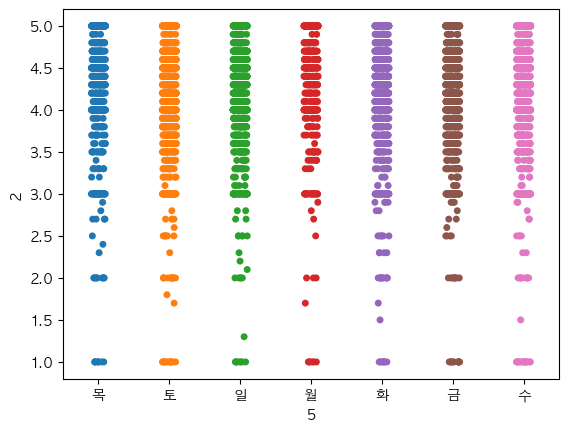

In [30]:
sns.stripplot(
    x=5,
    y=2,
    data=google_review,
    hue=5,
    legend=False
)
plt.show()

In [31]:
tourism_spot = pd.read_csv("../Data/제주특별자치도_관내_관광지데이터_20221201.csv")
tourism_spot

,연번,관광지명,관광지 분야,관광지 구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자
0,1,1100고지(휴게소),자연,관광지,제주특별자치도 서귀포시 1100로 1555,제주특별자치도 서귀포시 색달동 산1-3,33.357773,126.462520,230,안내소+주차장+화장실,펜션,NaN,115.0,40,한라산 정상을 동쪽에 끼고 제주시와 서귀포시를 잇는 산간도로 1100로는 제주도 최...,064-713-9950,한라산국립공원,2022-12-01
1,2,1100고지습지,자연,관광지,제주특별자치도 서귀포시 1100로 1555,제주특별자치도 서귀포시 색달동 산 1-2,33.357619,126.463057,22794,안내소+주차장+화장실,펜션,NaN,4955.0,40,1100고지 습지는 한라산 고원지대에 형성된 대표적인 산지습지로서 16개 이상의 습...,064-713-9950,한라산국립공원,2022-12-01
2,3,1112도로,자연,관광지,제주특별자치도 제주시 명림로 584,제주특별자치도 제주시 봉개동 산78-1,33.439260,126.628326,297000,NaN,리조트,NaN,6465.0,NaN,대한민국에서 가장 아름다운 도로 중 하나로 길 양 옆으로 하늘로 곧게 뻗은 삼나무들...,064-712-6988,제주특별자치도청,2022-12-01
3,4,4.3해원방사탑,문화,관광지,제주특별자치도 제주시 신산로 82,제주특별자치도 제주시 일도이동 837-20,33.505213,126.534893,1179,안내소+주차장+화장실,호텔+게스트하우스,1998-04-03,256.0,70,"제주도에는 예로부터 마을 어느 한 방위에 불길한 징조가 있거나, 풍수지리설에 따라 ...",064-712-6988,제주특별자치도청,2022-12-01
4,5,5.16도로숲터널,자연,관광지,제주특별자치도 서귀포시 516로,제주특별자치도 서귀포시 남원읍 신례리 산 2-1,33.361754,126.622834,12000,NaN,NaN,NaN,2609.0,NaN,5.16 도로를 지나면 도로 양쪽 나무가 아치형으로 도로를 감싸는 울창한 나무 터널...,064-710-8590,제주특별자치도도로관리과,2022-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1043,후포해변,자연,관광지,제주특별자치도 제주시 추자면 대서리 267,제주특별자치도 제주시 추자면 대서5길 87,33.962368,126.289403,NaN,NaN,호텔+펜션+게스트하우스+민박,NaN,NaN,NaN,탈의실과 편의시설을 갖춘 작은 휴양지,064-740-6000,제주특별자치도청,2022-12-01
1043,1044,훈데르트바서파크,기타,관광지,제주특별자치도 제주시 우도면 우도해안길 32-12,NaN,33.507434,126.954269,NaN,NaN,NaN,NaN,NaN,NaN,"훈데르트바서파크는 오스트리아 3대 화가이자 환경 운동가, 건축 치료사 ‘훈데르트바서...",064-710-2114,제주특별자치도청,2022-12-01
1044,1045,휴애리 매화축제,축제,관광지,제주특별자치도 서귀포시 남원읍 신례리 2081,제주특별자치도 서귀포시 남원읍 신례동로 256,33.308964,126.633806,52942,주차장,게스트하우스+관광호텔,NaN,11509.0,50,매화 꽃 향기와 함께 봄의 시작을 알리는 제주 대표 봄 축제,064-732-2114,제주특별자치도청,2022-12-01
1045,1046,휴애리 자연생활공원,생태공원,관광지,"제주특별자치도 서귀포시 남원읍 신례동로 256 (신례리, 휴애리)",제주특별자치도 제주시 우도면 연평리 24731,33.308757,126.633794,46000,공용주차장+현금결제+카드결제+화장실+무료 WIFI+편의점+음료대+유도 및 안내시설+...,호텔+펜션+게스트하우스,NaN,10000.0,NaN,자연속 동·식물들과 교감이 있는 체험형 자연생활공원,064-762-2190,㈜휴에리,2022-12-01


In [32]:
tourism_spot.columns

Index(['연번', '관광지명', '관광지 분야', '관광지 구분', '소재지도로명주소', '소재지지번주소', '위도', '경도',
       '면적', '공공편익시설정보', '숙박시설정보', '지정일자', '수용인원수', '주차가능수', '관광지소개',
       '관리기관전화번호', '관리기관명', '데이터기준일자'],
      dtype='object')

In [33]:
tourism_spot['관광지 구분'].unique()

array(['관광지'], dtype=object)

In [34]:
tourism_spot['관광지 분야'].unique()

array(['자연', '문화', '기타', '의료', '축제', '오름', '예술', '시장', '트레일', 'kwdus',
       '문화유적', '축제/행사', '지질트레일', '박물관', '유적', '유적 ', '사찰 ', '올레코스',
       '생태공원'], dtype=object)

In [35]:
tourism_spot['면적'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1042     True
1043     True
1044    False
1045    False
1046    False
Name: 면적, Length: 1047, dtype: bool

---
### 관광지가 어느 동/읍인지 분류

In [36]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as req
import time

In [37]:
korean_foreigner = pd.read_csv("../Data/jeju_tour.csv")
korean_foreigner

,연도,월,관광지명,한국인,외국인
0,2009,1,(주)제주미니미니랜드,11484,234
1,2009,1,국립제주박물관,26913,513
2,2009,1,도립미술관,0,0
3,2009,1,만장굴관광지,32019,1648
4,2009,1,목석원,4169,2119
...,...,...,...,...,...
6727,2019,12,카멜리아힐,64255,26897
6728,2019,12,테디베어뮤지엄,0,0
6729,2019,12,퍼시픽랜드,0,0
6730,2019,12,아쿠아플라넷,60363,5792


In [38]:
korean_foreigner['관광지명']

0       (주)제주미니미니랜드
1           국립제주박물관
2             도립미술관
3            만장굴관광지
4               목석원
           ...     
6727          카멜리아힐
6728        테디베어뮤지엄
6729          퍼시픽랜드
6730         아쿠아플라넷
6731            화락원
Name: 관광지명, Length: 6732, dtype: object

In [39]:
spot_list = korean_foreigner['관광지명'].unique()
spot_list = spot_list.tolist()
spot_list

['(주)제주미니미니랜드',
 '국립제주박물관',
 '도립미술관',
 '만장굴관광지',
 '목석원',
 '민속자연사박물관',
 '비자림',
 '산굼부리',
 '삼성혈',
 '삼양선사유적지',
 '생각하는 정원',
 '절물자연휴양림',
 '제주도립 김창열미술관',
 '제주돌문화공원',
 '제주러브랜드',
 '제주목관아지',
 '제주별빛누리공원',
 '제주항일기념관',
 '한라산국립공원',
 '한림공원',
 '항몽 유적지',
 '해녀 박물관',
 '감귤박물관',
 '기당미술관',
 '마라해양도립공원',
 '박물관은살아있다',
 '산방산',
 '서귀포도립해양공원',
 '서귀포자연휴양림',
 '서복전시관',
 '성산일출봉',
 '소리섬박물관',
 '소인국테마파크',
 '신영영화박물관',
 '아프리카박물관',
 '여미지식물원',
 '이중섭미술관',
 '익스트림 아일랜드',
 '일출랜드',
 '정방폭포',
 '제주민속촌박물관',
 '제주조각공원',
 '제주추사관',
 '중문주상절리대',
 '천제연폭포',
 '천지연폭포',
 '카멜리아힐',
 '테디베어뮤지엄',
 '퍼시픽랜드',
 '아쿠아플라넷',
 '화락원']

In [40]:
# chrom_options = webdriver.ChromeOptions()
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options=chrom_options)
# driver.get("https://www.google.com/maps/?hl=ko")

# url = "https://www.google.com/maps/?hl=ko"
# res = req.urlopen(url)
# soup = BeautifulSoup(res,"html.parser")

In [41]:
# address_list = []
# for spot in spot_list:
#     try:
#         time.sleep(1)
#         print(spot)
#         # 검색창에 관광지 상호 입력
#         driver.find_element(By.XPATH,'//*[@id="searchboxinput"]').send_keys(spot)
#         # 검색버튼 클릭
#         driver.find_element(By.XPATH,'//*[@id="searchbox-searchbutton"]').click()
#         # 상세정보에서 상세주소 가져오기
#         address = driver.find_element(By.CLASS_NAME,'rogA2c').get_attribute('textContent')
#         print(address)
#         time.sleep(secs=1)

#         driver.find_element(By.CLASS_NAME,'gsst_a').click()
#         time.sleep(secs=1)
#         address_list.append(address)
#     except:
#         print("----------\n오류\n----------")
#         pass
# address_list


In [42]:
chinese = pd.read_csv("../Data/chinese_jeju.csv")

In [43]:
chinese

,기준 연도,방문 지역,비율(%)
0,2015,강원,3.78
1,2016,강원,2.83
2,2017,강원,2.38
3,2018,강원,3.39
4,2019,강원,2.26
...,...,...,...
80,2015,충북,0.28
81,2016,충북,0.17
82,2017,충북,1.32
83,2018,충북,1.25


https://open.jejudatahub.net/api/proxy/12ta2a2t291tDbbabtbD9t1a219tbDbt/{your_projectKey}?{params(key=value)}

In [44]:
import requests
import json

In [45]:
jeju_attraction = pd.read_csv("../Data/jeju_attraction.csv")
jeju_attraction

,시,읍면동,관광지 수
0,서귀포시,강정동,6
1,서귀포시,남원읍,58
2,서귀포시,대정읍,65
3,서귀포시,대포동,7
4,서귀포시,도순동,3
...,...,...,...
62,제주시,한림읍,64
63,제주시,해안동,3
64,제주시,화북이동,1
65,제주시,화북일동,2


In [46]:
jeju_attraction['읍면동'].unique()

array(['강정동', '남원읍', '대정읍', '대포동', '도순동', '동홍동', '법환동', '보목동', '상예동',
       '상효동', '색달동', '서귀동', '서호동', '서홍동', '성산읍', '신효동', '안덕면', '영남동',
       '월평동', '중문동', '토평동', '표선면', '하예동', '하원동', '하효동', '호근동', '회수동',
       '건입동', '구좌읍', '내도동', '노형동', '도두이동', '도두일동', '봉개동', '삼도이동', '삼도일동',
       '삼양삼동', '삼양이동', '삼양일동', '아라이동', '아라일동', '애월읍', '연동', '영평동', '오등동',
       '오라이동', '외도이동', '용강동', '용담삼동', '용담이동', '용담일동', '우도면', '이도이동',
       '이도일동', '이호이동', '이호일동', '일도이동', '일도일동', '조천읍', '추자면', '한경면', '한림읍',
       '해안동', '화북이동', '화북일동', '회천동'], dtype=object)

In [55]:
jeju_total = pd.read_csv("../Data/jeju_total.csv")

In [50]:
jeju_foreigner = pd.read_csv("../Data/jeju_foreigner.csv")

In [53]:
# jeju_total.drop(index=0,inplace=True)

In [54]:
jeju_total.to_csv("../Data/jeju_total.csv")

In [56]:
jeju_total

,Unnamed: 0,행정동명,2019년 01월,2019년 02월,2019년 03월,2019년 04월,2019년 05월,2019년 06월,2019년 07월,2019년 08월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
0,1,건입동,"128,123","115,266","132,868","141,119","145,939","144,096","149,359","209,153",...,"198,827","170,960","199,557","235,279","260,371","276,339","371,223","199,826","252,456","210,427"
1,2,구좌읍,"399,817","373,998","439,812","491,809","551,273","525,421","554,090","701,516",...,"681,527","489,699","651,955","760,707","753,243","768,295","948,157","584,078","803,012","556,341"
2,3,남원읍,"345,305","260,709","210,166","246,931","280,713","268,745","251,710","290,251",...,"424,168","290,438","393,951","464,641","402,822","358,550","415,597","285,814","417,085","321,934"
3,4,노형동,"358,757","330,379","289,173","302,198","301,443","302,440","393,987","480,760",...,"670,280","482,410","593,745","671,831","692,542","727,364","812,330","576,860","449,221","399,996"
4,5,대륜동,"227,123","203,367","225,811","245,878","286,992","241,713","239,081","319,087",...,"345,750","250,420","325,039","371,322","372,536","387,785","429,546","316,691","425,120","351,179"
5,6,대정읍,"293,430","273,360","310,605","357,260","358,406","302,983","268,542","339,744",...,"401,014","310,489","441,134","485,598","421,693","387,635","536,579","354,475","461,054","371,965"
6,7,대천동,"175,876","159,869","157,244","177,361","202,580","180,975","200,573","222,712",...,"229,483","150,093","204,455","230,308","245,518","266,284","301,393","186,549","151,124","118,237"
7,8,도두동,"165,380","144,563","175,872","194,096","167,472","146,266","141,172","166,340",...,"164,070","126,659","172,485","169,648","193,099","181,154","230,988","166,226","253,525","208,031"
8,9,동홍동,"84,315","82,988","68,939","70,881","85,807","69,450","62,334","72,746",...,"83,612","61,823","69,541","79,610","77,567","89,305","99,014","66,389","52,605","41,296"
9,10,봉개동,"100,131","89,861","110,640","160,224","193,550","165,478","144,274","166,217",...,"130,549","87,896","149,457","181,179","177,153","159,621","167,279","132,136","202,790","164,661"


In [58]:
# jeju_foreigner.drop(index=0,inplace=True)

In [60]:
jeju_foreigner.to_csv("../Data/jeju_foreigner.csv")

In [ ]:
card